In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")  #resimler 28*28 boyutunda olduğu için 784

In [2]:
type(dataset), type(dataset["data"]), type(dataset["data"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [3]:
X, y = dataset["data"], dataset["target"]  #x inputy output

In [4]:
X = X/255  #broadcasting normalize  
#verileri 0 1 aralığına çekti

In [5]:
X.shape  #her bir satırda 1 resim var

(70000, 784)

In [6]:
y.shape    #her bir satırda bir tane data var

(70000,)

In [7]:
img_1 = X[1,:].reshape(28,28)  #x den 1. sutunu al ve 28 28 lik bi yapı aline donustur

In [8]:
import matplotlib.pyplot as plt

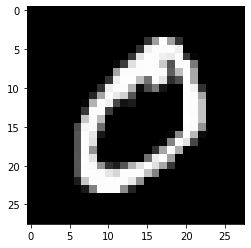

In [9]:
plt.imshow(img_1,cmap='gray')
plt.show()

In [10]:
y[1]

'0'

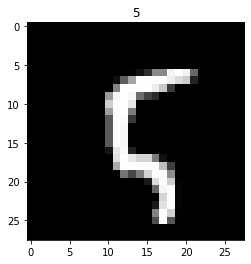

In [11]:
i=100
img_1 = X[100,:].reshape(28,28)
plt.imshow(img_1,cmap='gray')
plt.title(y[i])
plt.show()

In [12]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new
y
#y new de sadece 0 ve 1 ler oluşacak

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)
#60000 değeri seçip train için kullanacağız train ile bul test ile test et
#model eğitildi 


In [14]:
#random değerler belirlenir
np.random.seed(138)
shuffle_index = np.random.permutation(m)  #yer değiştirme yapıyor
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

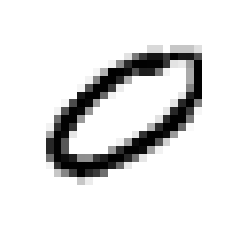

[0.]


In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,1].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [16]:
epsilon = 1e-5
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [17]:
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    l = -(1./m) * (np.sum(np.multiply(np.log(Y_hat+epsilon),Y)) + np.sum(np.multiply(np.log(1-Y_hat+epsilon),(1-Y))))
    return l

In [18]:
learning_rate = 1
X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))
for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    cost = compute_loss(Y,A)
    
    dW = (1/m)*np.matmul(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y, axis=1, keepdims=True)
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if(i%100==0):
        print("Epoch", i, "cost: ", cost)
print("final cost: ", cost)

Epoch 0 cost:  0.6780211644256914
Epoch 100 cost:  7.076902320959307e-06
Epoch 200 cost:  6.788042310395345e-06
Epoch 300 cost:  6.509536669410533e-06
Epoch 400 cost:  6.240823541302168e-06
Epoch 500 cost:  5.981381523350092e-06
Epoch 600 cost:  5.730726063487388e-06
Epoch 700 cost:  5.488406237169835e-06
Epoch 800 cost:  5.254001858305007e-06
Epoch 900 cost:  5.027120884411438e-06
Epoch 1000 cost:  4.807397081508456e-06
Epoch 1100 cost:  4.594487918813517e-06
Epoch 1200 cost:  4.388072667200991e-06
Epoch 1300 cost:  4.187850678699888e-06
Epoch 1400 cost:  3.993539827179672e-06
Epoch 1500 cost:  3.8048750928081207e-06
Epoch 1600 cost:  3.6216072750061164e-06
Epoch 1700 cost:  3.4435018204477878e-06
Epoch 1800 cost:  3.27033775424194e-06
Epoch 1900 cost:  3.10190670381746e-06
final cost:  2.9396291168853666e-06


In [19]:
y_test[0,100] = 1.0

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels)) #doğru ve yanlış değerleri buluyoruz
#1 değeri bizim yanlış olan değerimiz olumuş oluyor

[[9999    1]
 [   0    0]]


In [21]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\arzut\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
